In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

salary_df=pd.read_csv('real_estate_data.csv')
salary_df

,year,bed,bath,sqft,price
0,1958,3,1.5,3110,236900
1,1989,3,1.5,3120,291900
2,2020,2,1.0,2010,241500
3,2014,3,1.5,2650,281400
4,1984,2,1.5,1530,137500
...,...,...,...,...,...
495,1992,2,1.5,1670,172800
496,2020,3,1.5,3140,377800
497,2000,3,1.5,2290,236000
498,2020,2,1.5,2050,252200


In [ ]:
print("hellp world")

In [2]:
year = salary_df['year']
bed = salary_df['bed']
bath = salary_df['bath']
sqft = salary_df['sqft']

Regression with year

coefficients 	 [979.45641452]
intercept 	 -1660782.51203517
R^2 value 	 0.020152832542723265
residuals 
 0      -20093.147588
1        4543.703562
2      -76219.445288
3      -30442.706801
4     -144959.014366
           ...      
495   -117494.665682
496     60080.554712
497    -62130.316998
498    -65519.445288
499     44257.293199
Name: price, Length: 500, dtype: float64


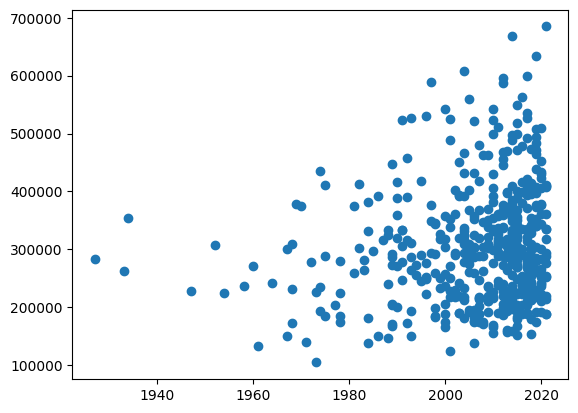

In [3]:
X = np.array([year]).T
price = salary_df['price']

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

plt.scatter(year, price)

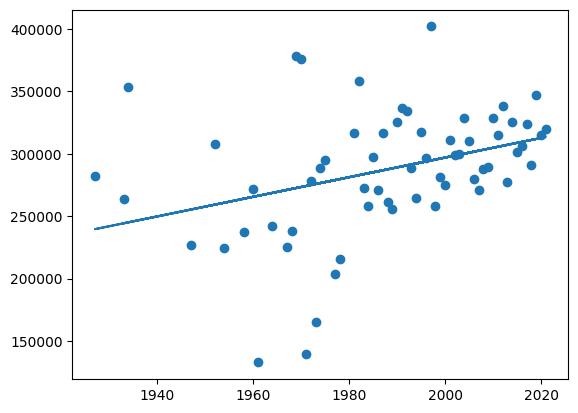

In [4]:
years = year.unique()
avg = []
for x in years:
  temp = salary_df[salary_df['year']==x]
  temp = temp['price']
  len = temp.size
  sum = temp.sum()
  temp_avg = sum / len
  avg.append(temp_avg)
data = np.array([years, avg]).T
myFrame = pd.DataFrame(data, columns=['year', 'price'])

regression = np.polyfit(years, avg, 1)
model = np.poly1d(regression)

res = avg-model(years)
plt.scatter(years, avg)
plt.plot(years, model(years))

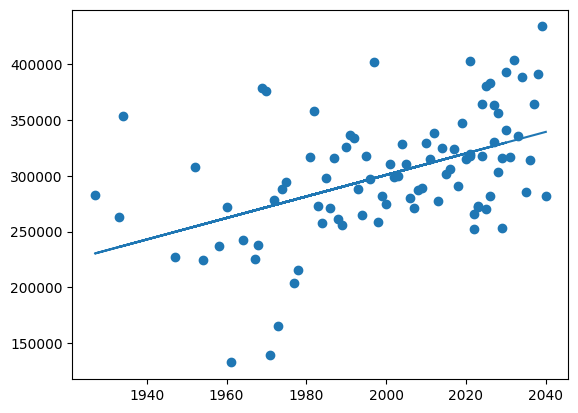

In [ ]:
# generating data for the future
max= 2021
dev = np.std(res)
Y_temp = []
price_temp = []
for i in range(20):
  year = max + i
  price_pred = model(year)
  bias = np.random.randn()
  price_bias = price_pred+bias*dev
  Y_temp.append(year)
  price_temp.append(price_bias)

years = np.append(years, Y_temp)
avg = np.append(avg, price_temp)

regression = np.polyfit(years, avg, 1)
model = np.poly1d(regression)

res = avg-model(years)
plt.scatter(years, avg)
plt.plot(years, model(years))

Regression with bed

In [5]:
X = np.array([bed]).T

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

coefficients 	 [103525.72153251]
intercept 	 1137.0359097582987
R^2 value 	 0.7933732361194773
residuals 
 0     -74814.200507
1     -19814.200507
2      33311.521025
3     -30314.200507
4     -70688.478975
           ...     
495   -35388.478975
496    66085.799493
497   -75714.200507
498    44011.521025
499    44385.799493
Name: price, Length: 500, dtype: float64


Regression with bath

In [6]:
X = np.array([bath]).T

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

coefficients 	 [170380.05206356]
intercept 	 33733.497271009604
R^2 value 	 0.6270283029800351
residuals 
 0      -52403.575366
1        2596.424634
2       37386.450665
3       -7903.575366
4     -151803.575366
           ...      
495   -116503.575366
496     88496.424634
497    -53303.575366
498    -37103.575366
499     66796.424634
Name: price, Length: 500, dtype: float64


Regression with sqft

In [7]:
X = np.array([sqft]).T

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

coefficients 	 [104.32339894]
intercept 	 13256.977723349759
R^2 value 	 0.8997967727565468
residuals 
 0     -100802.748435
1      -46845.982425
2       18552.990402
3       -8313.984922
4      -35371.778106
           ...      
495    -14677.053958
496     36967.549597
497    -16157.561302
498     25080.054444
499     21526.953533
Name: price, Length: 500, dtype: float64


Regression with parameters

In [8]:
X = np.array([year, bed, bath, sqft]).T

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

coefficients 	 [ 1553.15847504 12022.60289912  8760.30619558    92.24865144]
intercept 	 -3118549.5690481192
R^2 value 	 0.951983388675247
residuals 
 0     -21736.299041
1     -15806.698281
2       4444.148083
3     -21778.793983
4      -3742.947224
           ...     
495     6216.973774
496    20100.415964
497   -12225.060815
498     7074.048928
499    13254.285900
Name: price, Length: 500, dtype: float64


whats the proportion of each bed size apartment volume in the market

do the avg price of each apartment size (corelation between price and each size)

bath for me - how bath affects the price of each ap-size
do the propertion of bath.size

what's the price of sqft in each apartment size
